In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

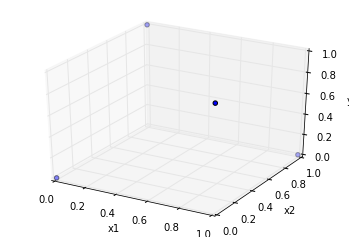

In [373]:
train_dataset = np.array([[0,0],[0,1],[1,0],[1,1]]).astype(np.float32)
train_labels = np.array([[0],[1],[1],[0]]).astype(np.float32)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1 = train_dataset[:,0]
x2 = train_dataset[:,1]
y = train_labels.flatten()

ax.scatter(x1, x2, y)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_xlim([0.0,1.0])
ax.set_ylim([0.0,1.0])
ax.set_zlim([0.0,1.0])

plt.show()

In [483]:
def tf_prediction(X,W1,b1,W2,b2):
    h = tf.matmul(X,W1) + b1
    r = tf.nn.relu(h)
    return tf.matmul(r,W2) + b2

graph = tf.Graph()
with graph.as_default():
    X = tf.placeholder(tf.float32, shape=[4,2])
    y = tf.placeholder(tf.float32, shape=[4,1])

#     W1 = tf.Variable(tf.random_normal([2,2], -1.0, 1.0))
    W1 = tf.Variable([[1.0,0.0],[0.0,1.0]])
    b1 = tf.Variable(tf.zeros([2]))

#     W2 = tf.Variable(tf.random_normal([2,1], -1.0, 1.0))
    W2 = tf.Variable([[1.0],[0.0]])
    b2 = tf.Variable(tf.zeros([1]))

    # Minimize the mean squared errors
    loss = tf.reduce_mean(tf.square(tf_prediction(X,W1,b1,W2,b2) - y))
    optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

    train_prediction = tf_prediction(X, W1, b1, W2, b2)

    summary_writer = tf.train.SummaryWriter('xor', tf.get_default_graph())

In [484]:

# with tf.Session(graph=graph) as sess:
#     for step in range(201):
#         sess.run(train)
#         if step % 20 == 0:
#             print(step, sess.run(W), sess.run(b))

# saver = tf.train.Saver()


with tf.Session(graph=graph) as sess:
    sess.run(tf.initialize_all_variables())
    feed_dict = {X : train_dataset, y : train_labels}

    for step in range(2001):
        _, l, predictions, weights1, biases1, weights2, biases2 = sess.run([optimizer, loss, train_prediction, W1, b1, W2, b2], feed_dict=feed_dict)

        if step == 0:
            init_weights1, init_biases1, init_weights2, init_biases2 = weights1, biases1, weights2, biases2 
        if step % 200 == 0:
            print('Loss at step %d: %f ' % (step,l))

        if step == 2000:
    #         save_path = saver.save(sess, "/tmp/xor_model.ckpt")
    #         print("Model saved in file: %s" % save_path)
            print("Final predictions:")
            print(predictions)


Loss at step 0: 0.500000 
Loss at step 200: 0.000010 
Loss at step 400: 0.000000 
Loss at step 600: 0.000000 
Loss at step 800: 0.000000 
Loss at step 1000: 0.000000 
Loss at step 1200: 0.000000 
Loss at step 1400: 0.000000 
Loss at step 1600: 0.000000 
Loss at step 1800: 0.000000 
Loss at step 2000: 0.000000 
Final predictions:
[[  7.77784237e-08]
 [  9.99999404e-01]
 [  9.99999940e-01]
 [  5.77872697e-07]]


In [485]:
def prediction(X, W1, b1, W2, b2):
    h = np.dot(X,W1) + b1
    r = np.maximum(0, h)
    return np.dot(r,W2) + b2

init_weights1:
[[ 0.94999999  0.        ]
 [-0.05        1.        ]]
init_biases1:
[-0.05  0.  ]
init_weights2:
[[ 0.94999999]
 [ 0.        ]]
biases2:
[  7.77784237e-08]


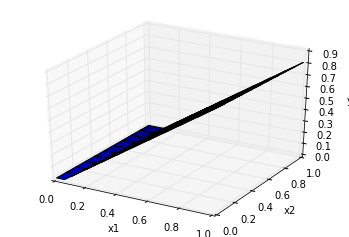

In [486]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = x2 = np.arange(0.0, 1.01, 0.01)
px1, px2 = np.meshgrid(x1, x2)

pX = np.array([[x,y] for x,y in zip(np.ravel(px1), np.ravel(px2))]).astype(np.float32)


py = prediction(pX, init_weights1, init_biases1, init_weights2, init_biases2)

ax.plot_surface(px1, px2, py.reshape(px1.shape))

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
# ax.set_xlim([0.0,1.0])
# ax.set_ylim([0.0,1.0])
# ax.set_zlim([0.0,1.0])

print('init_weights1:')
print(init_weights1)
print('init_biases1:')
print(init_biases1)
print('init_weights2:')
print(init_weights2)
print('biases2:')
print(biases2)


plt.show()

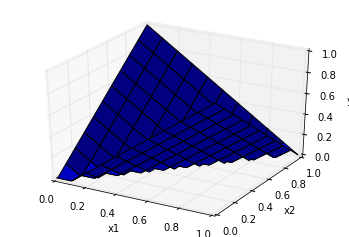

In [487]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = x2 = np.arange(0.0, 1.01, 0.01)
px1, px2 = np.meshgrid(x1, x2)

pX = np.array([[x,y] for x,y in zip(np.ravel(px1), np.ravel(px2))]).astype(np.float32)


py = prediction(pX, weights1, biases1, weights2, biases2)

ax.plot_surface(px1, px2, py.reshape(px1.shape))

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_xlim([0.0,1.0])
ax.set_ylim([0.0,1.0])
ax.set_zlim([0.0,1.0])

plt.show()

In [488]:
print(weights1)

[[ 0.91170001 -0.9944638 ]
 [-0.82340103  1.01105559]]


In [489]:
print(bias1)

[  0.  -25.5]


In [490]:
print(weights2)

[[ 1.21447492]
 [ 1.00556588]]


In [491]:
print(bias2)

[ 0.50000012]


In [492]:
print(predictions)

[[  7.77784237e-08]
 [  9.99999404e-01]
 [  9.99999940e-01]
 [  5.77872697e-07]]


In [493]:
a = tf.random_uniform([2,2], -1.0, 2.0)

sess = tf.Session()
sess.run(tf.initialize_all_variables())

print(sess.run(a))

[[ 1.16664219 -0.99037266]
 [-0.72580242  1.14573622]]
